In [1]:
from keras.models import Sequential

/Users/kategroschner/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.backend import tensorflow_backend as K

In [3]:
model = Sequential()

In [34]:
from keras.layers import LSTM, Dense, Conv1D

In [5]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv('/Users/kategroschner/Downloads/gdso/weather1_education_train.csv',parse_dates=True)

In [9]:
test = pd.read_csv('/Users/kategroschner/Downloads/gdso/weather1_education_test.csv',parse_dates=True)

In [10]:
test = test.set_index('timestamp')

In [11]:
test = test.drop(columns=['Unnamed: 0'])

In [12]:
df = df.set_index('timestamp')
df = df.drop(columns=['Unnamed: 0'])

In [65]:
a = test[test['building_name']=='PrimClass_Jacob']

In [67]:
a.shape

(8757, 85)

In [68]:
b = test[test['building_name']=='PrimClass_Judith']

In [69]:
b.shape

(8757, 85)

In [82]:
test.head()

,area,building_name,electricity,primary_space_usage,TemperatureC,month,year,date,hour,weekday,...,hour_22,hour_23,wkday_0,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,PSU_PrimClass
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-01 00:00:00,6149.0,PrimClass_Jacob,34.900002,PrimClass,7.0,12,2014,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 01:00:00,6149.0,PrimClass_Jacob,32.700000,PrimClass,5.0,12,2014,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 02:00:00,6149.0,PrimClass_Jacob,32.200000,PrimClass,5.0,12,2014,1,2,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 03:00:00,6149.0,PrimClass_Jacob,32.300000,PrimClass,6.0,12,2014,1,3,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 04:00:00,6149.0,PrimClass_Jacob,32.599998,PrimClass,7.0,12,2014,1,4,0,...,0,0,1,0,0,0,0,0,0,1


In [85]:
a = test.pivot_table(values=['electricity','TemperatureC'],index='building_name',columns=['electricity','TemperatureC'])

In [86]:
a

,TemperatureC,electricity
building_name,,
PrimClass_Jacob,9.470367,46.930457
PrimClass_Jacquelyn,9.470367,8.891082
PrimClass_Jaden,9.470367,6.001276
PrimClass_Janie,9.470367,7.489041
PrimClass_Janis,9.470367,2.380223
PrimClass_Jasmine,9.470367,8.929486
PrimClass_Jayda,9.470367,10.955298
PrimClass_Jean,9.470367,9.945419
PrimClass_Jeff,9.470367,4.718552


In [64]:
df.head()

,area,building_name,electricity,primary_space_usage,TemperatureC,month,year,date,hour,weekday,...,hour_23,wkday_0,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,PSU_PrimClass,PSU_UnivClass
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-01 00:00:00,2777.0,PrimClass_Jacqueline,5.0,PrimClass,7.0,12,2014,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2014-12-01 01:00:00,2777.0,PrimClass_Jacqueline,5.2,PrimClass,5.0,12,2014,1,1,0,...,0,1,0,0,0,0,0,0,1,0
2014-12-01 02:00:00,2777.0,PrimClass_Jacqueline,5.2,PrimClass,5.0,12,2014,1,2,0,...,0,1,0,0,0,0,0,0,1,0
2014-12-01 03:00:00,2777.0,PrimClass_Jacqueline,5.5,PrimClass,6.0,12,2014,1,3,0,...,0,1,0,0,0,0,0,0,1,0
2014-12-01 04:00:00,2777.0,PrimClass_Jacqueline,6.0,PrimClass,7.0,12,2014,1,4,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
def monthsplit(df,months,lastidx):
    X = []
    Y = []
    for n in df['building_name'].drop_duplicates():
        X_n = []
        Y_n = []
        subset = df[df['building_name']==n]
        for row in subset.iterrows():
            row = np.array(row[-1])
            if row[5] in months:
                r = np.concatenate((row[0:1],row[2:3],row[4:lastidx]))
                X_n.append(r)
            else:
                Y_n.append(row[2])
        X.append(X_n)
        Y.append(Y_n)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [61]:
def monthsplit_norm(df,months,lastidx):
    X = []
    Y = []
    for n in df['building_name'].drop_duplicates():
        X_n = []
        Y_n = []
        subset = df[df['building_name']==n]
        for row in subset.iterrows():
            row = np.array(row[-1])
            if row[5] in months:
                r = []
                for idx in np.arange(0,lastidx):
                    if idx == 1 or idx == 3:
                        pass
                    else:
                        r.append(row[idx:idx+1]/max(row[idx]))
                X_n.append(r)
            else:
                Y_n.append(row[2]/max(row[2]))
        X.append(X_n)
        Y.append(Y_n)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [62]:
testX_norm, testY_norm = monthsplit_norm(test,[12,1,2],85)

TypeError: 'float' object is not iterable

In [22]:
testX.shape

(19, 2159, 83)

In [23]:
testY.shape

(19, 6598)

In [17]:
trainX, trainY = monthsplit(df,[12,1,2],-1)

In [18]:
trainX.shape

(50, 2159, 83)

In [19]:
model = Sequential()
model.add(LSTM(256, input_shape=(2159,83)))
model.add(Dense(6598))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 76s - loss: 1384.7237
Epoch 2/5
 - 75s - loss: 1302.9605
Epoch 3/5
 - 74s - loss: 1228.9113
Epoch 4/5
 - 76s - loss: 1164.5497
Epoch 5/5
 - 76s - loss: 1113.0580


In [24]:
pred = model.predict(testX)

In [25]:
mean_squared_error(testY,pred)

299.892491052195

In [26]:
import matplotlib.pyplot as plt

In [27]:
pred.shape

(19, 6598)

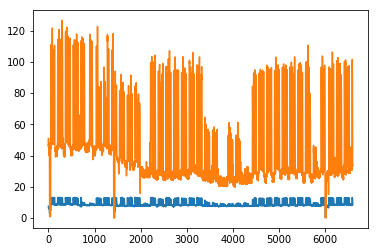

In [29]:
plt.plot(pred[0])
plt.plot(testY[0])

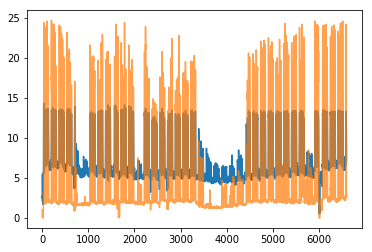

In [32]:
plt.plot(pred[10])
plt.plot(testY[10],alpha = 70)

In [39]:
model2 = Sequential()
model2.add(LSTM(128,return_sequences=True, input_shape=(2159,83)))
model2.add(LSTM(128))
model2.add(Dense(6598))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 125s - loss: 1341.8336
Epoch 2/5
 - 136s - loss: 1188.2768
Epoch 3/5
 - 133s - loss: 1087.9817
Epoch 4/5
 - 129s - loss: 1021.7195
Epoch 5/5
 - 127s - loss: 967.1714


In [41]:
pred2 = model2.predict(testX)

In [46]:
mean_squared_error(testY,pred2)

281.6630873717253

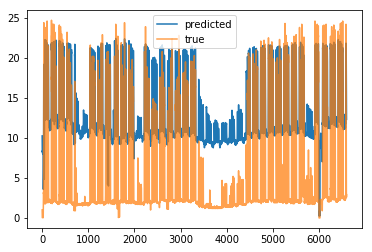

In [44]:
plt.plot(pred2[10])
plt.plot(testY[10],alpha = 70)
plt.legend(['predicted','true'])

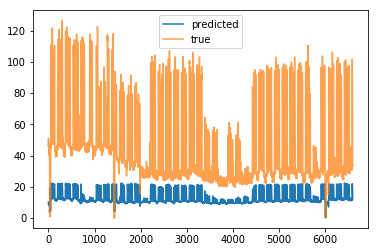

In [45]:
plt.plot(pred2[0])
plt.plot(testY[0],alpha = 70)
plt.legend(['predicted','true'])

In [49]:
trainX.shape

(50, 2159, 83)

In [48]:
trainX_norm = MinMaxScaler().fit_transform(trainX)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
def monthsplit2(df,months,lastidx):
    X = []
    Y = []
    for m in np.arange(0,12):
        input_time = 
        for n in df['building_name'].drop_duplicates():
            X_n = []
            Y_n = []
            subset = df[df['building_name']==n]
            for row in subset.iterrows():
                row = np.array(row[-1])
                if row[5] in months:
                    r = np.concatenate((row[0:1],row[2:3],row[4:lastidx]))
                    X_n.append(r)
                else:
                    Y_n.append(row[2])
            X.append(X_n)
            Y.append(Y_n)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [74]:
meta = pd.read_csv('/Users/kategroschner/Desktop/the-building-data-genome-project-master/data/raw/meta_open.csv')

In [77]:
elec = pd.read_csv('/Users/kategroschner/Desktop/the-building-data-genome-project-master/data/processed/temp_open_utc_complete.csv')

In [76]:
weather_file = 'weather1.csv'

In [90]:
a = test.reset_index()

In [91]:
a = a.set_index(['building_name','timestamp']).unstack(1)

In [92]:
a

area                      \
timestamp           2014-12-01 00:00:00 2014-12-01 01:00:00   
building_name                                                 
PrimClass_Jacob                  6149.0              6149.0   
PrimClass_Jacquelyn              1597.0              1597.0   
PrimClass_Jaden                  2572.0              2572.0   
PrimClass_Janie                  1691.0              1691.0   
PrimClass_Janis                   736.0               736.0   
PrimClass_Jasmine                2555.0              2555.0   
PrimClass_Jayda                  2215.0              2215.0   
PrimClass_Jean                   2678.0              2678.0   
PrimClass_Jeff                   1086.0              1086.0   
PrimClass_Jeffery               11201.0             11201.0   
PrimClass_Jermaine               2154.0              2154.0   
PrimClass_Jesse                  1468.0              1468.0   
PrimClass_Jill                   2238.0              2238.0   
PrimClass_Jim                    1014.0              1014.0   
PrimClass_Joel                   1295.0              1295.0   
PrimClass_Johnathon              2253.0              2253.0   
PrimClass_Johnnie                1769.0              1769.0   
PrimClass_Jose                   1123.0              1123.0   
PrimClass_Judith                 1205.0              1205.0   

                                                             \
timestamp           2014-12-01 02:00:00 2014-12-01 03:00:00   
building_name                                                 
PrimClass_Jacob                  6149.0              6149.0   
PrimClass_Jacquelyn              1597.0              1597.0   
PrimClass_Jaden                  2572.0              2572.0   
PrimClass_Janie                  1691.0              1691.0   
PrimClass_Janis                   736.0               736.0   
PrimClass_Jasmine                2555.0              2555.0   
PrimClass_Jayda                  2215.0              2215.0   
PrimClass_Jean                   2678.0              2678.0   
PrimClass_Jeff                   1086.0              1086.0   
PrimClass_Jeffery               11201.0             11201.0   
PrimClass_Jermaine               2154.0              2154.0   
PrimClass_Jesse                  1468.0              1468.0   
PrimClass_Jill                   2238.0              2238.0   
PrimClass_Jim                    1014.0              1014.0   
PrimClass_Joel                   1295.0              1295.0   
PrimClass_Johnathon              2253.0              2253.0   
PrimClass_Johnnie                1769.0              1769.0   
PrimClass_Jose                   1123.0              1123.0   
PrimClass_Judith                 1205.0              1205.0   

                                                             \
timestamp           2014-12-01 04:00:00 2014-12-01 05:00:00   
building_name                                                 
PrimClass_Jacob                  6149.0              6149.0   
PrimClass_Jacquelyn              1597.0              1597.0   
PrimClass_Jaden                  2572.0              2572.0   
PrimClass_Janie                  1691.0              1691.0   
PrimClass_Janis                   736.0               736.0   
PrimClass_Jasmine                2555.0              2555.0   
PrimClass_Jayda                  2215.0              2215.0   
PrimClass_Jean                   2678.0              2678.0   
PrimClass_Jeff                   1086.0              1086.0   
PrimClass_Jeffery               11201.0             11201.0   
PrimClass_Jermaine               2154.0              2154.0   
PrimClass_Jesse                  1468.0              1468.0   
PrimClass_Jill                   2238.0              2238.0   
PrimClass_Jim                    1014.0              1014.0   
PrimClass_Joel                   1295.0              1295.0   
PrimClass_Johnathon              2253.0              2253.0   
PrimClass_Johnnie                1769.0              1769.0   
P

In [93]:
meta.head()

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
0,PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
1,UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
2,Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
3,Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
4,PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv


In [99]:
meta = meta.set_index('uid')

In [102]:
buildings = list(meta[meta['newweatherfilename'] == weather_file].index)

In [103]:
buildings

['PrimClass_Jolie',
 'PrimClass_Jaylin',
 'Office_Jesus',
 'PrimClass_Jayla',
 'PrimClass_Janiya',
 'PrimClass_Janice',
 'Office_Jett',
 'Office_Jerry',
 'PrimClass_Jaden',
 'PrimClass_Jermaine',
 'PrimClass_Josephine',
 'Office_Jackie',
 'PrimClass_Javier',
 'PrimClass_Jeanette',
 'PrimClass_Julius',
 'PrimClass_Jaylinn',
 'PrimClass_Johanna',
 'PrimClass_Jodie',
 'PrimClass_Johnathan',
 'PrimClass_Janis',
 'PrimClass_Jamal',
 'PrimClass_Jose',
 'PrimClass_Julianna',
 'PrimClass_Jasmine',
 'PrimClass_Jazmine',
 'PrimClass_Justin',
 'PrimClass_Jody',
 'PrimClass_Julianne',
 'PrimClass_Justice',
 'PrimClass_Jean',
 'PrimClass_Jenna',
 'PrimClass_Judith',
 'PrimClass_Jessie',
 'PrimClass_Joselyn',
 'PrimClass_Judy',
 'PrimClass_Jarrett',
 'PrimClass_Jeannine',
 'PrimClass_Jeff',
 'PrimClass_Julian',
 'PrimClass_Jeanine',
 'UnivClass_Jadon',
 'PrimClass_Jerome',
 'PrimClass_Jacqueline',
 'PrimClass_Jill',
 'PrimClass_Jim',
 'PrimClass_Janet',
 'PrimClass_Janie',
 'PrimClass_Jensen',
 'Pri

In [105]:
new_df = pd.DataFrame(columns={'building_name', 'timestamp', 'electricity', 'area', 'primary_space_usage','industry','weather_file'}) #empty dataframe with 3 columns
for building in buildings:
    subdf = elec[['timestamp', building]]
    subdf.columns = ['timestamp', 'electricity']
    subdf['building_name'] = building
    subdf['industry'] = meta.loc[building,'industry']
    subdf['area'] = meta.loc[building, 'sqm']
    subdf['primary_space_usage'] = meta.loc[building, 'primaryspaceuse_abbrev']
    new_df = pd.concat([new_df, subdf], axis=0, ignore_index=True)

/Users/kategroschner/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kategroschner/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kategroschner/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [107]:
new_df.head()

,area,building_name,electricity,industry,primary_space_usage,timestamp,weather_file
0,2927.0,PrimClass_Jolie,NaN,Education,PrimClass,2010-01-01 08:00:00+00:00,NaN
1,2927.0,PrimClass_Jolie,NaN,Education,PrimClass,2010-01-01 09:00:00+00:00,NaN
2,2927.0,PrimClass_Jolie,NaN,Education,PrimClass,2010-01-01 10:00:00+00:00,NaN
3,2927.0,PrimClass_Jolie,NaN,Education,PrimClass,2010-01-01 11:00:00+00:00,NaN
4,2927.0,PrimClass_Jolie,NaN,Education,PrimClass,2010-01-01 12:00:00+00:00,NaN


In [114]:
type(new_df['timestamp'])

pandas.core.series.Series

In [113]:
new_df['timestamp'] = pd.to_datetime(new_df['timestamp'])

In [115]:
dif = subdf[subdf['building_name']=='Office_Joni']['timestamp'].iloc[-1]-subdf[subdf['building_name']=='Office_Joni']['timestamp'].iloc[0]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [116]:
subdf[subdf['building_name']=='Office_Joni']['timestamp'].iloc[-1]

'2016-01-01 06:00:00+00:00'

In [122]:
subdf[subdf['building_name']=='Office_Joni']['timestamp'].iloc[0]

'2010-01-01 08:00:00+00:00'

In [119]:
new_df[new_df['building_name']=='Office_Joni']['timestamp'].iloc[-1]-new_df[new_df['building_name']=='Office_Joni']['timestamp'].iloc[0]

Timedelta('2190 days 22:00:00')

In [121]:
new_df[new_df['building_name']=='PrimClass_Jolie']['timestamp'].iloc[-1]-new_df[new_df['building_name']=='PrimClass_Jolie']['timestamp'].iloc[0]

Timedelta('2190 days 22:00:00')

In [123]:
test.head()

,area,building_name,electricity,primary_space_usage,TemperatureC,month,year,date,hour,weekday,...,hour_22,hour_23,wkday_0,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,PSU_PrimClass
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-01 00:00:00,6149.0,PrimClass_Jacob,34.900002,PrimClass,7.0,12,2014,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 01:00:00,6149.0,PrimClass_Jacob,32.700000,PrimClass,5.0,12,2014,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 02:00:00,6149.0,PrimClass_Jacob,32.200000,PrimClass,5.0,12,2014,1,2,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 03:00:00,6149.0,PrimClass_Jacob,32.300000,PrimClass,6.0,12,2014,1,3,0,...,0,0,1,0,0,0,0,0,0,1
2014-12-01 04:00:00,6149.0,PrimClass_Jacob,32.599998,PrimClass,7.0,12,2014,1,4,0,...,0,0,1,0,0,0,0,0,0,1


In [124]:
test.shape

(166383, 85)

In [136]:
s = test[test['building_name']=='PrimClass_Jacob']

In [144]:
s.index[-1]-s.index[0]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [143]:
s.index[0]

'2014-12-01 00:00:00'

In [146]:
import datetime

In [149]:
dif = datetime.datetime.strptime(s.index[-1], '%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(s.index[0], '%Y-%m-%d %H:%M:%S')

In [152]:
dif

datetime.timedelta(364, 82800)

In [150]:
datetime.timedelta(days=365) > dif

True

In [151]:
datetime.timedelta(days=365)

datetime.timedelta(365)

In [153]:
len(s.index)

8757

In [154]:
b = test.iloc[:8757]

In [156]:
b.shape

(8757, 85)